- BaggingRegressor
- KNeighborsRegressor
- RandomForest Regressor
- AdaBoost Regressor

In [ ]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [ ]:
# read data
df = pd.read_csv('./data/data02_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=1)

### Bagging Methods

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
# usual knn
knn.fit(xtrain, ytrain)
print(knn.score(xtrain, ytrain), knn.score(xtest, ytest))

In [ ]:
# full bagging
bf = BaggingRegressor(knn, n_estimators=100, max_samples=1.0, max_features=1.0, random_state=0)
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

In [ ]:
# bagging with subsampling and feature randomization
bf = BaggingRegressor(knn, n_estimators=500, max_samples=0.5, max_features=0.5)
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

In [ ]:
# effect of estimators
np.random.seed(0)
n_list = [1,5,10,20,30,50,100,200,500,1000]
s = np.zeros((len(n_list),2))
for i in range(len(n_list)):
    bf = BaggingRegressor(knn, n_estimators=n_list[i], max_samples=0.5, max_features=0.5)
    bf.fit(xtrain, ytrain)
    s[i,0] = bf.score(xtrain,ytrain)
    s[i,1] = bf.score(xtest,ytest)
plt.plot(np.log10(n_list),s,marker='o')

In [ ]:
# parameter tunning
np.random.seed(1)
params = np.arange(2,20,2)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = BaggingRegressor(KNeighborsRegressor(params[i]), n_estimators=200,
                          random_state=0, max_samples=0.5, max_features=0.5, oob_score=True)
    f.fit(xtrain, ytrain)
    s[i,0] = f.score(xtrain, ytrain)
    s[i,1] = cross_val_score(f,xtrain, ytrain, cv=5).mean()

In [ ]:
s[i,2] = f.score(xtest, ytest)
plt.plot(s)

### Random Forest Regressor

In [ ]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(xtrain, ytrain)
yhat_test = rf.predict(xtest)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

In [ ]:
# number of features to be chosen
rf = RandomForestRegressor(n_estimators=100, random_state=0, max_features='sqrt')
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))

In [ ]:
# tree size
rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=100)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

#### 참고
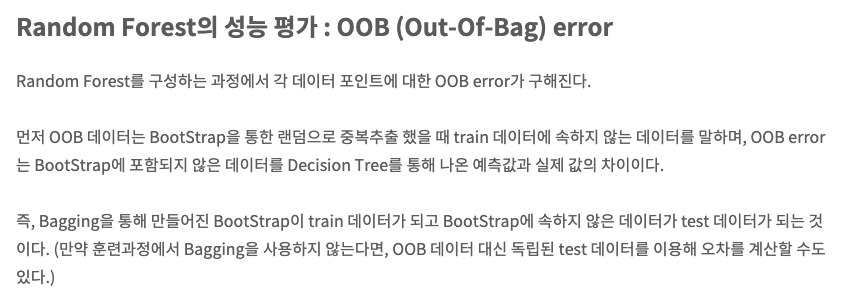

In [ ]:
# oob score
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100,
                           oob_score=True)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))
print(rf.oob_score_)  # out-of-bag score

In [ ]:
# parameter tuning using oob scores
tree_size = np.arange(2, 50, 2)
s = np.zeros((len(tree_size),4))

for i in range(len(tree_size)):
    rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=tree_size[i],
                           oob_score=True)
    rf.fit(xtrain,ytrain)
    s[i,0] = rf.score(xtrain,ytrain)
    s[i,1] = rf.oob_score_ 
    s[i,2] = cross_val_score(rf,xtrain,ytrain,cv=5).mean()
    s[i,3] = rf.score(xtest,ytest)

plt.plot(tree_size, s)

### AdaBoost

- [참고](http://www.incodom.kr/Adaboost)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)

In [ ]:
# usual knn
knn.fit(xtrain,ytrain)
print(knn.score(xtrain,ytrain), knn.score(xtest,ytest))

In [ ]:
# adaboost with knn
f = AdaBoostRegressor(knn, n_estimators=20, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

In [ ]:
# adaboost with tree
f = AdaBoostRegressor(None, n_estimators=10, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

In [ ]:
# parameter tuning
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
parameters = {
    'base_estimator': [knn, None],
    'n_estimators': np.arange(2,200,2)
    }
f = GridSearchCV(model,parameters,cv=3)
f.fit(xtrain,ytrain)

In [ ]:
f.best_params_
f.best_score_
f.best_estimator_

In [ ]:
print(f.score(xtrain, ytrain), f.score(xtest, ytest))